# FastAI

In [65]:
from fastai.vision.all import *
from fastai.vision.widgets import *
import pandas as pd

In [22]:
# Create a data loader
annotations = pd.read_csv('../data/raw/annotations.csv',names=['image','label'])
annotations = annotations.sample(frac=1, random_state=2020)
annotations['is_valid'] = [np.random.choice(2) for _ in range(400)]

In [27]:
annotations['image'] = annotations['image'].apply(lambda x: f'../data/raw/all/{x.lower()}')

In [29]:
dls = ImageDataLoaders.from_df(df=annotations,
                               valid_col='is_valid', 
                               label_col='label',
                               item_tfms=Resize(224))

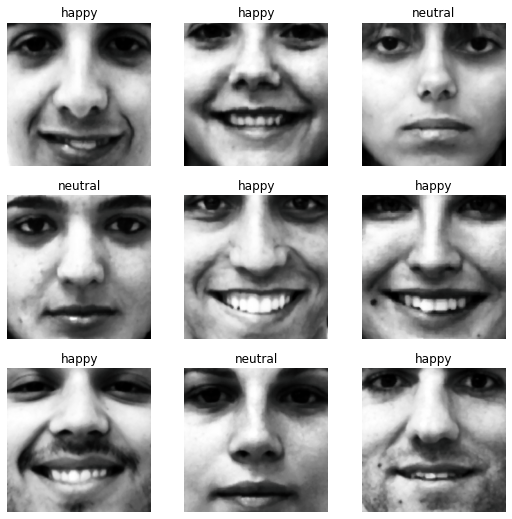

In [43]:
dls.show_batch()

In [35]:
smile_model = cnn_learner(dls, resnet34, metrics=error_rate)

In [36]:
smile_model.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,1.254817,0.876480,0.502488,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.506854,0.703644,0.383085,00:01
1,0.371951,0.522759,0.238806,00:01
2,0.303809,0.376199,0.149254,00:01
3,0.248547,0.311820,0.109453,00:01
4,0.203866,0.278395,0.089552,00:01
5,0.173336,0.260237,0.074627,00:01
6,0.153743,0.255380,0.069652,00:01
7,0.135661,0.254121,0.069652,00:01
8,0.116839,0.249265,0.064677,00:01
9,0.101842,0.235998,0.074627,00:01


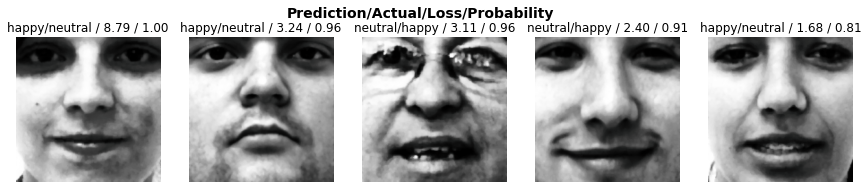

In [39]:
interp = ClassificationInterpretation.from_learner(smile_model)
interp.plot_top_losses(5, nrows=1)

In [44]:
smile_model.export()

In [46]:
learn_inf = load_learner('./export.pkl')

In [52]:
learn_inf.predict('../data/processed/training/non_smile/Abraham_Foxman_0001.jpg')

('neutral', tensor(1), tensor([0.0604, 0.9396]))

In [57]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [58]:
btn_upload = SimpleNamespace(data = ['../data/processed/training/non_smile/Abraham_Foxman_0001.jpg'])

In [59]:
img = PILImage.create(btn_upload.data[-1])

In [80]:
out_pl = widgets.Output()
out_pl.clear_output()
# with out_pl: display(img.to_thumb(128,128))
# out_pl

In [72]:
pred,pred_idx,probs = learn_inf.predict(img)

In [73]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: neutral; Probability: 0.9396')

In [74]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [75]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [76]:
btn_upload = widgets.FileUpload()

In [81]:
VBox([widgets.Label('Select your face!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [83]:
# !pip install voila

In [85]:
!jupyter serverextension enable voila #—sys-prefix

Enabling: voila
- Writing config: /data/charboju/.jupyter
    - Validating...
      voila 0.2.3 OK
